In [1]:
#Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Read in data
w_basket_data = pd.read_csv('W_Basket_CMJ.csv')
w_basket_df= pd.DataFrame(w_basket_data)
w_basket_df.dropna()

#Printing the first 5 rows
print(w_basket_df.head())

                 TestId        Date      Time                  Name  Segment  \
0  Xj5YxalUvL4V3dKlEjVl  03/19/2025  14:14:29  5E9krELhCQ7yLvDGYsGo      NaN   
1  yVFT5nJ91FhYkFRHC0Z8  03/19/2025  14:13:00  5E9krELhCQ7yLvDGYsGo      NaN   
2  2UV2hDfm5NDmkuCjVsbl  03/11/2025  10:38:38  5E9krELhCQ7yLvDGYsGo      NaN   
3  uU2nvcJ74jje5Xj5beXP  03/11/2025  10:37:50  5E9krELhCQ7yLvDGYsGo      NaN   
4  AYm2iNAtPB6C09QOz6Qb  03/11/2025  10:36:13  5E9krELhCQ7yLvDGYsGo      NaN   

   Position                  Type  Excluded  Tags  System Weight  ...  \
0       NaN  Countermovement Jump       NaN   NaN        656.367  ...   
1       NaN  Countermovement Jump       NaN   NaN        657.101  ...   
2       NaN  Countermovement Jump       NaN   NaN        650.532  ...   
3       NaN  Countermovement Jump       NaN   NaN        650.637  ...   
4       NaN  Countermovement Jump       NaN   NaN        650.531  ...   

   Right Avg. Landing Force  L|R Landing Impulse Index     RSI    mRSI  \
0     

In [3]:
#Creating a new dataset with filtered metrics
metric_df= pd.DataFrame(w_basket_df[['TestId','Date', 'Time', 'Name', 'Jump Height', 'Avg. Braking Force', 'Avg. Propulsive Power',
                       'Time To Takeoff','Left Avg. Braking Force', 'Right Avg. Braking Force', 'L|R Avg. Braking Force', 'Peak Propulsive Power']])
print(metric_df.head())

                 TestId        Date      Time                  Name  \
0  Xj5YxalUvL4V3dKlEjVl  03/19/2025  14:14:29  5E9krELhCQ7yLvDGYsGo   
1  yVFT5nJ91FhYkFRHC0Z8  03/19/2025  14:13:00  5E9krELhCQ7yLvDGYsGo   
2  2UV2hDfm5NDmkuCjVsbl  03/11/2025  10:38:38  5E9krELhCQ7yLvDGYsGo   
3  uU2nvcJ74jje5Xj5beXP  03/11/2025  10:37:50  5E9krELhCQ7yLvDGYsGo   
4  AYm2iNAtPB6C09QOz6Qb  03/11/2025  10:36:13  5E9krELhCQ7yLvDGYsGo   

   Jump Height  Avg. Braking Force  Avg. Propulsive Power  Time To Takeoff  \
0       0.4163           1385.0155              2363.5456            0.622   
1       0.4044           1398.4769              2307.5014            0.603   
2       0.4003           1359.5469              2252.8850            0.693   
3       0.3627           1371.9685              2139.8421            0.653   
4       0.3967           1335.5441              2280.3264            0.632   

   Left Avg. Braking Force  Right Avg. Braking Force  L|R Avg. Braking Force  \
0                 665.97

In [4]:
metric_df.describe()

,Jump Height,Avg. Braking Force,Avg. Propulsive Power,Time To Takeoff,Left Avg. Braking Force,Right Avg. Braking Force,L|R Avg. Braking Force,Peak Propulsive Power
count,1957.000000,1957.000000,1957.000000,1957.000000,1957.000000,1957.000000,1957.000000,1957.000000
mean,0.326283,1403.274521,2003.707712,0.728464,680.546457,722.728063,-2.927192,3652.493299
std,0.050065,222.976403,262.657434,0.108018,114.152442,130.829232,7.310024,435.397501
min,0.099600,725.076900,1240.493900,0.314000,319.396200,405.680800,-24.755000,2302.076800
25%,0.287300,1249.500000,1847.832700,0.653000,613.432000,620.188800,-8.332000,3389.226900
50%,0.322600,1396.014800,2009.486800,0.720000,675.579200,719.636400,-3.644400,3628.133700
75%,0.358900,1551.094400,2198.130200,0.792000,761.898400,795.948300,2.415100,3952.211800
max,0.468400,2146.465100,3334.719800,1.195000,1013.119000,1183.896600,22.827600,6114.124300


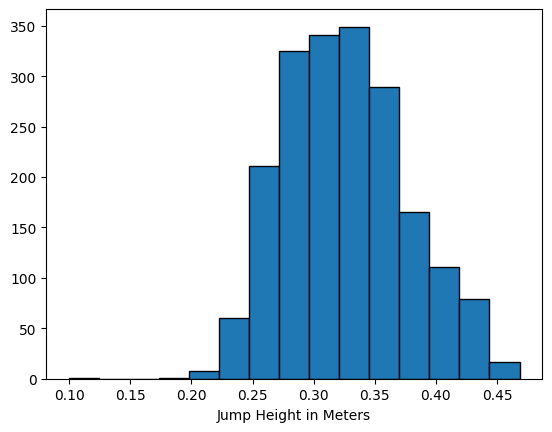

In [5]:
#Jump Height Histogram
jump_height_array = metric_df['Jump Height'].values
plt.hist(jump_height_array, bins=15, edgecolor='black')
plt.xlabel('Jump Height in Meters')
plt.show()

Text(0, 0.5, 'Deviation from Mean')

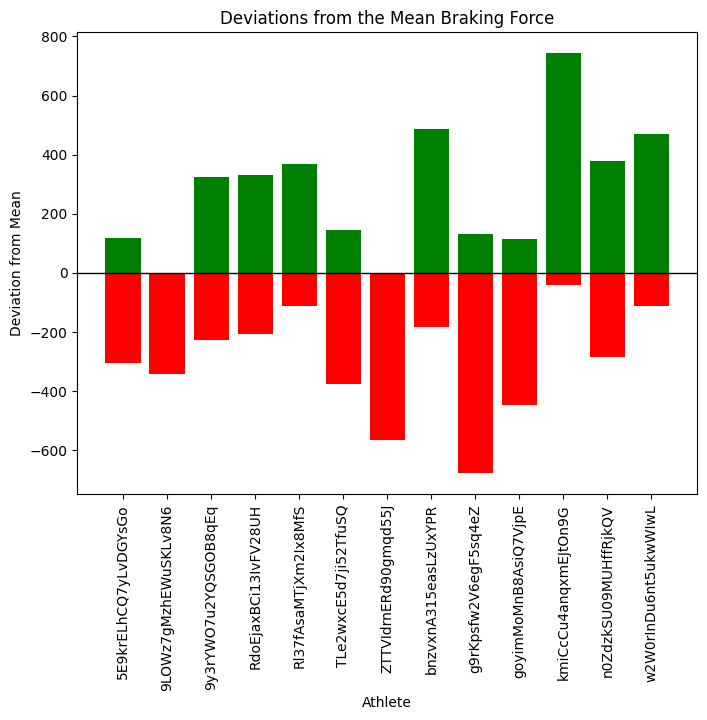

In [6]:
#Athlete deviations from the Mean - Average Braking Force
braking_array= metric_df['Avg. Braking Force'].values
braking_avg= np.average(braking_array)

braking_deviations= braking_array - braking_avg
athlete_array = metric_df['Name'].values

plt.figure(figsize = (8,6))
plt.bar(athlete_array, braking_deviations, color=['red' if x < 0 else 'green' for x in braking_deviations])

plt.axhline(0, color='black',linewidth=1)  
plt.xticks(rotation=90)


plt.title('Deviations from the Mean Braking Force')
plt.xlabel('Athlete')
plt.ylabel('Deviation from Mean')

<Axes: xlabel='L|R Avg. Braking Force', ylabel='count'>

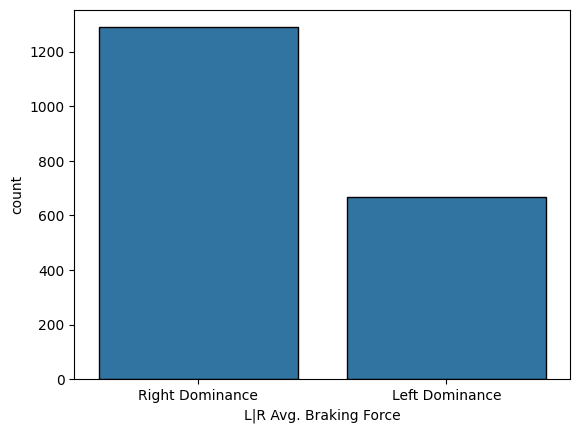

In [7]:
#Counting left vs right dominance for braking phase
#Positive L/R Average Braking Force means right dominance 
#Negative means left dominance 
L_R_dominance= metric_df['L|R Avg. Braking Force'] > 0
L_R_dominance_labels = L_R_dominance.map({True: 'Left Dominance', False: 'Right Dominance'})

sns.countplot(data= metric_df, x= L_R_dominance_labels, edgecolor='black')

Text(0, 0.5, 'Jump Height')

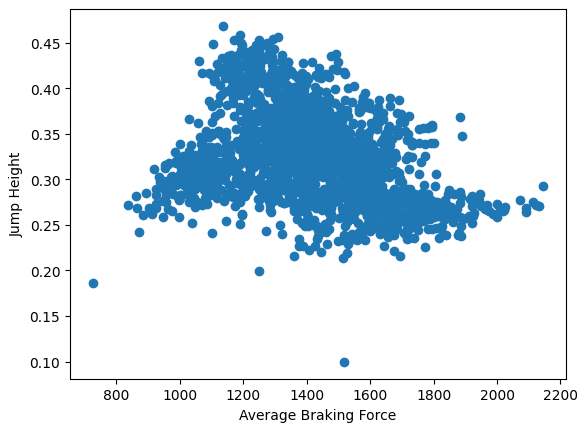

In [8]:
#Scatterplot to test relationship between Jump Height and Average Braking Force
plt.scatter(metric_df['Avg. Braking Force'], metric_df['Jump Height'])
plt.xlabel('Average Braking Force')
plt.ylabel('Jump Height')

In [9]:
#Calculating the correlation coefficient 
metric_df['Avg. Braking Force'].corr(metric_df['Jump Height'])

np.float64(-0.31772026891512867)

Text(0, 0.5, 'Jump Height')

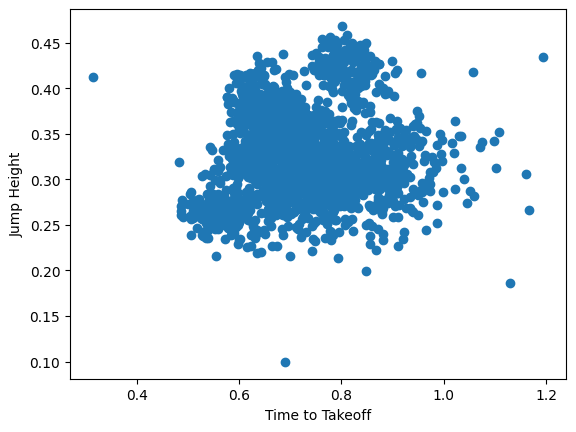

In [10]:
#Scatterplot to test relationship between Jump Height and Time to Takeoff
plt.scatter(metric_df['Time To Takeoff'], metric_df['Jump Height'])
plt.xlabel('Time to Takeoff')
plt.ylabel('Jump Height')

In [11]:
metric_df['Time To Takeoff'].corr(metric_df['Jump Height'])

np.float64(0.11827946768997108)

Text(0, 0.5, 'Average Propulsive Power')

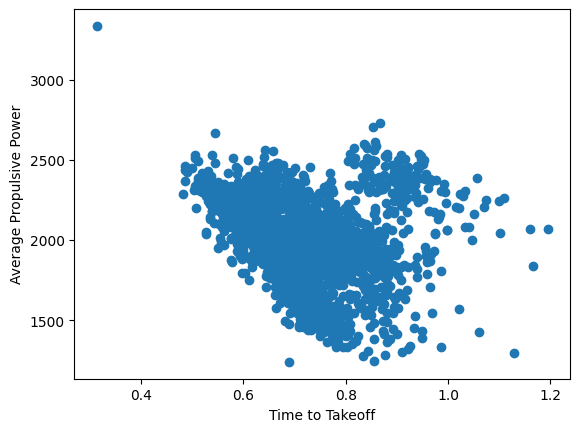

In [12]:
#Scatterplot to test relationship between Time to Takeoff and Average Propulsive Power
plt.scatter(metric_df['Time To Takeoff'], metric_df['Avg. Propulsive Power'])
plt.xlabel('Time to Takeoff')
plt.ylabel('Average Propulsive Power')

In [13]:
#Calculating the correlation coefficient 
metric_df['Time To Takeoff'].corr(metric_df['Avg. Propulsive Power'])

np.float64(-0.24475113355131112)

Text(0, 0.5, 'Peak Propulsive Power')

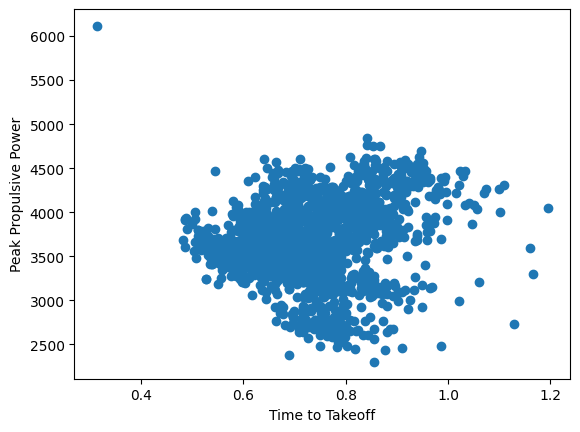

In [14]:
#Scatterplot to test relationship between Time to Takeoff and Peak Propulsive Power
plt.scatter(metric_df['Time To Takeoff'], metric_df['Peak Propulsive Power'])
plt.xlabel('Time to Takeoff')
plt.ylabel('Peak Propulsive Power')

In [15]:
#Calculating the correlation coefficient 
metric_df['Time To Takeoff'].corr(metric_df['Peak Propulsive Power'])

np.float64(0.18363161409398066)

<Axes: xlabel='Jump Height', ylabel='Name'>

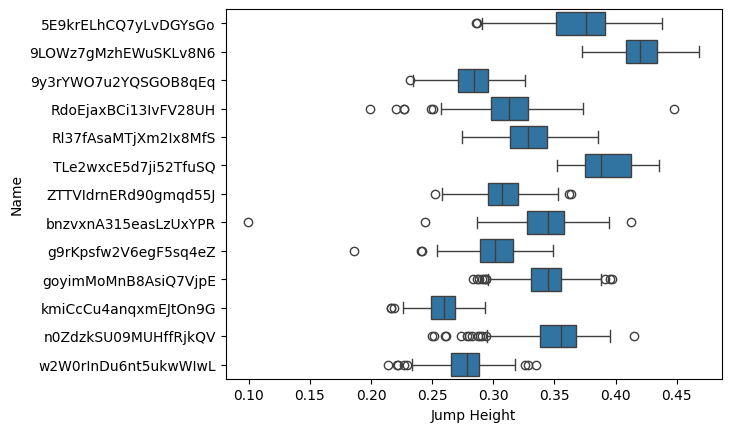

In [16]:
#Boxplot showing the average jump height per athlete 
sns.boxplot(data=metric_df, x='Jump Height', y='Name')

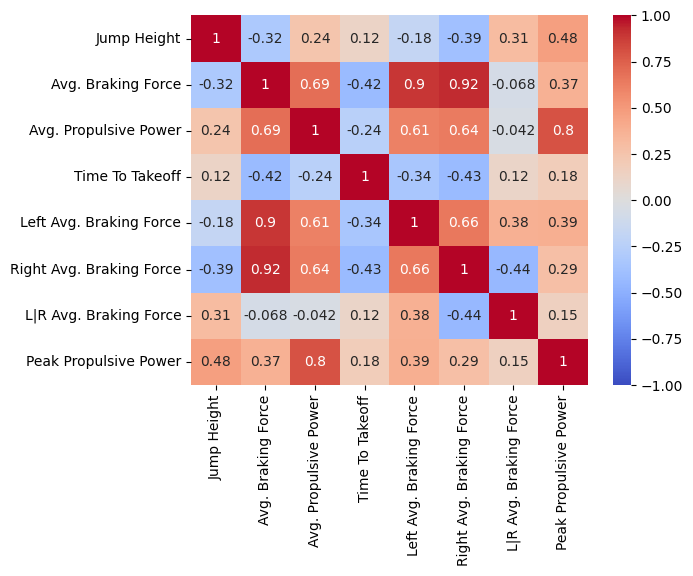

In [17]:
#Creating a correlation matrix for the metric_df without string values
metric_corr_df= pd.DataFrame(w_basket_df[['Jump Height', 'Avg. Braking Force', 'Avg. Propulsive Power',
                                             'Time To Takeoff','Left Avg. Braking Force', 'Right Avg. Braking Force', 
                                             'L|R Avg. Braking Force', 'Peak Propulsive Power']])
corr_matrix = metric_corr_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()